In [1]:
import matplotlib.pyplot as plt
import numpy as np

path = './data/runs/run@/1200-test-log.csv' # replace @ with run number
RUN_COUNT = 8

In [2]:
def load_log(p):
    values = []
    with open(p, 'r') as f:
        for l in f.readlines():
            values.append([float(i) for i in l.replace('\n', '').split(',')])

    return values

In [3]:
runs_data = []
runs_data_uncapped = []

# for now we'll cap at 100 epochs since I did more than 100 on some.
for i in range(RUN_COUNT):
    runs_data.append(np.array(load_log(path.replace('@', str(i+1))))[:100])
    runs_data_uncapped.append(np.array(load_log(path.replace('@', str(i+1)))))

run_labels = ['base', '500 hidden', '500 hidden, 2000 synapse', '50 mutations', '500 hidden 4000 synapse', '500 hidden, 4000 synapse, 50 num_mutations',
             '1000 synapse, 0.3 random_factor', '500 hidden, 4000 synapse (again)']

Text(0.5, 1.0, 'Training accuracy')

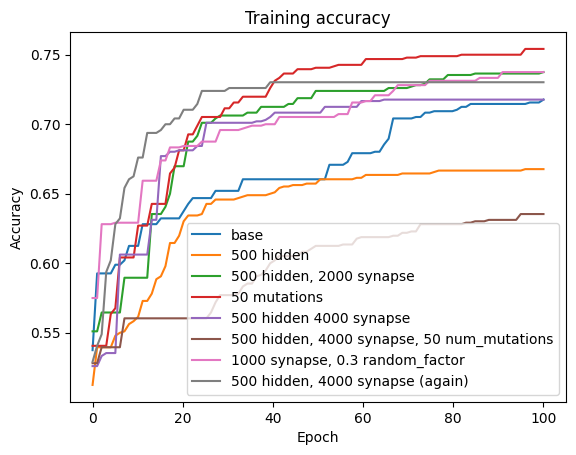

In [4]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(RUN_COUNT):
    plt.plot(np.linspace(0, len(runs_data[i]), len(runs_data[i])), runs_data[i][:, 0], label=run_labels[i])
plt.legend()
plt.title('Training accuracy')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Validation set accuracy')

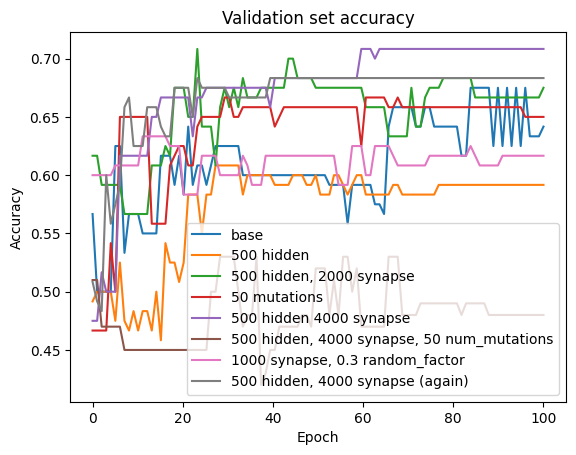

In [5]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(RUN_COUNT):
    plt.plot(np.linspace(0, len(runs_data[i]), len(runs_data[i])), runs_data[i][:, 1], label=run_labels[i])
plt.legend()
plt.title('Validation set accuracy')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Average pop accuracy')

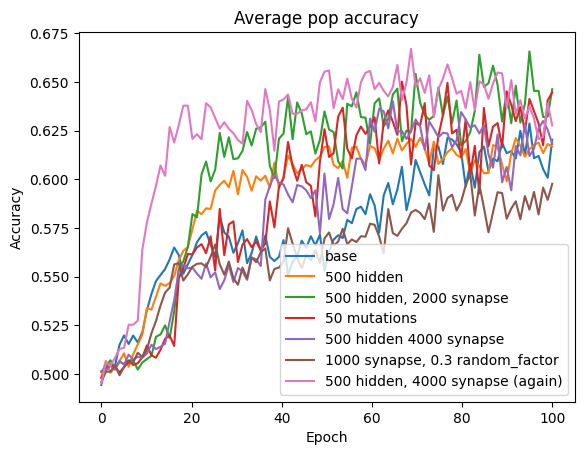

In [6]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(RUN_COUNT):
    if runs_data[i][:, 2].mean() != 0: # so we skip the ones that are missing pop data
        plt.plot(np.linspace(0, len(runs_data[i]), len(runs_data[i])), runs_data[i][:, 2], label=run_labels[i])
plt.legend()
plt.title('Average pop accuracy')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Training accuracy (200 epochs, from run 4 beyond)')

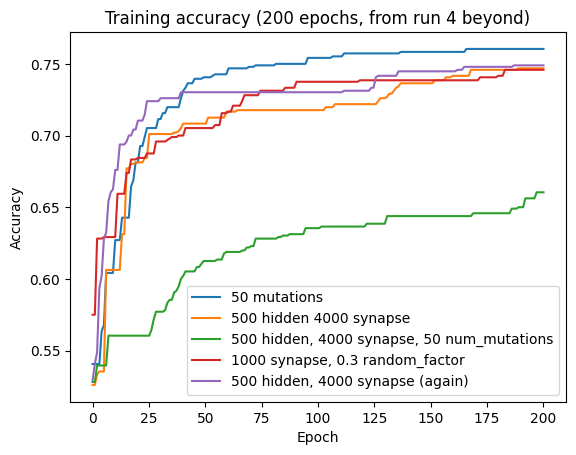

In [7]:
plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(3,RUN_COUNT):
    plt.plot(np.linspace(0, len(runs_data_uncapped[i]), len(runs_data_uncapped[i])), runs_data_uncapped[i][:, 0], label=run_labels[i])
plt.legend()
plt.title('Training accuracy (200 epochs, from run 4 beyond)')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

Text(0.5, 1.0, 'Validation accuracy (200 epochs, from run 4 beyond)')

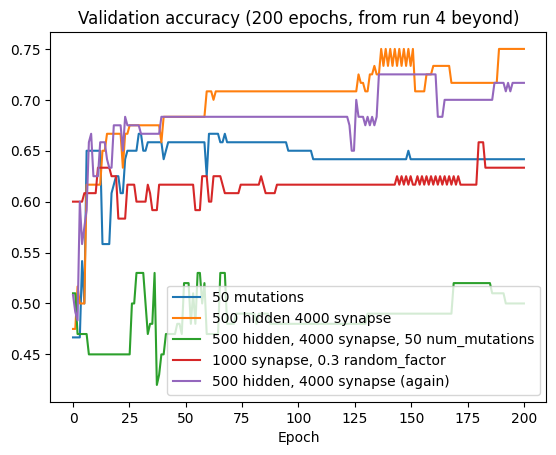

In [10]:
### plt.ylabel('Accuracy')
plt.xlabel('Epoch')

for i in range(3,RUN_COUNT):
    plt.plot(np.linspace(0, len(runs_data_uncapped[i]), len(runs_data_uncapped[i])), runs_data_uncapped[i][:, 1], label=run_labels[i])
plt.legend()
plt.title('Validation accuracy (200 epochs, from run 4 beyond)')

# Base settings are hidden_count = 250, synapse_count = 1000, num_mutations = 20

# Detailed analysis of hidden neuron count and synapse count

In [16]:
path = './data/runs2/@/1200-test-log.csv' # replace @ with run number
RUN_COUNT = 16

runs_data = []
for i in range(RUN_COUNT):
    runs_data.append(np.array(load_log(path.replace('@', str(i+1)))))


run_labels = np.array([(800+i*100, 4000-i*250) for i in range(RUN_COUNT)]) # tuples of format (synapse count, hidden neuron count)

Text(0.5, 1.0, 'Train accuracy for different combinations of synapse and neuron counts')

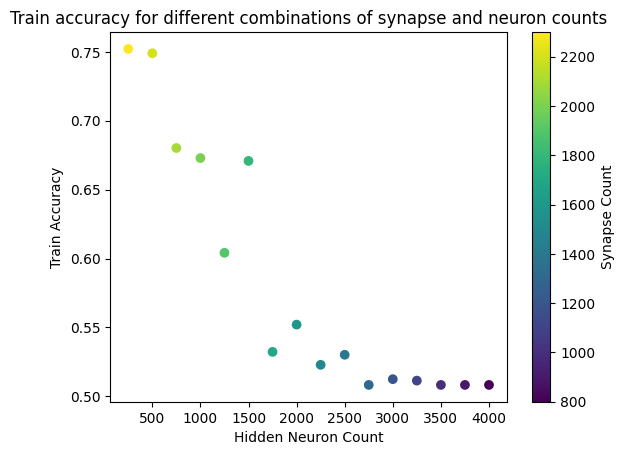

In [33]:
peak_accuracies = [r[-1][0] for r in runs_data]

plt.scatter([r[1] for r in run_labels], peak_accuracies, c=[r[0] for r in run_labels], cmap='viridis')
plt.colorbar(label='Synapse Count')
plt.xlabel('Hidden Neuron Count')
plt.ylabel('Train Accuracy')
plt.title('Train accuracy for different combinations of synapse and neuron counts')

Text(0.5, 1.0, 'Validation Accuracy for different combinations of synapse and neuron counts')

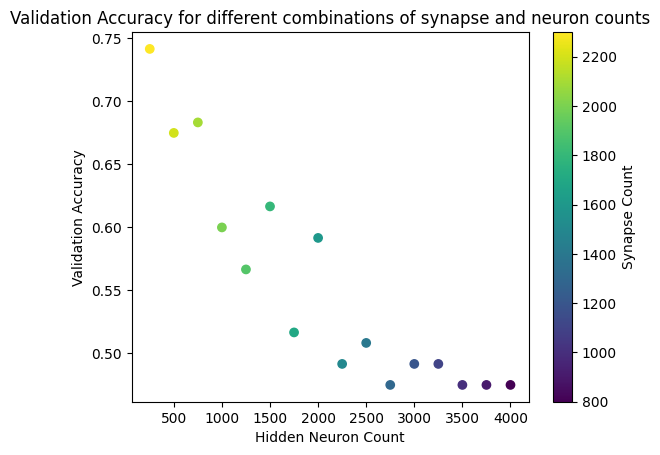

In [34]:
peak_accuracies = [r[-1][1] for r in runs_data] # validation data

plt.scatter([r[1] for r in run_labels], peak_accuracies, c=[r[0] for r in run_labels], cmap='viridis')
plt.colorbar(label='Synapse Count')
plt.xlabel('Hidden Neuron Count')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for different combinations of synapse and neuron counts')

Text(0.5, 1.0, 'Pop Average for different combinations of synapse and neuron counts')

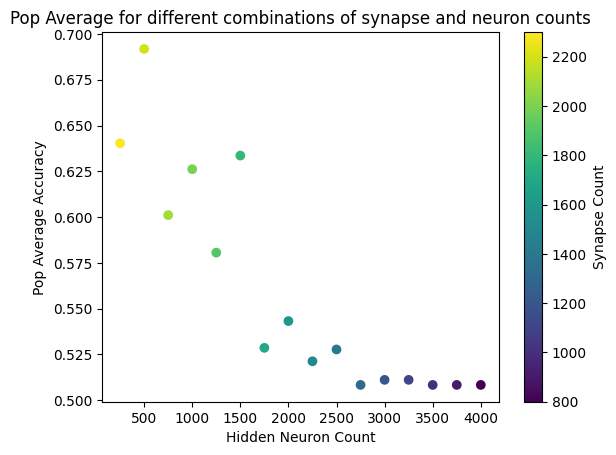

In [35]:
peak_accuracies = [r[-1][2] for r in runs_data] # pop average fit data

plt.scatter([r[1] for r in run_labels], peak_accuracies, c=[r[0] for r in run_labels], cmap='viridis')
plt.colorbar(label='Synapse Count')
plt.xlabel('Hidden Neuron Count')
plt.ylabel('Pop Average Accuracy')
plt.title('Pop Average for different combinations of synapse and neuron counts')

## Second Set of runs for synapse and hidden neuron count analysis 

In [5]:
path = './data/runs3/@/1200-test-log.csv' # replace @ with run number
RUN_COUNT = 20

runs_data = []
for i in range(RUN_COUNT):
    runs_data.append(np.array(load_log(path.replace('@', str(i))))) # little difference cause runs3 starts at 0


run_labels = np.array([(2200+i*150, 25+i*25) for i in range(RUN_COUNT)])

Text(0.5, 1.0, 'Train accuracy for different combinations of synapse and neuron counts')

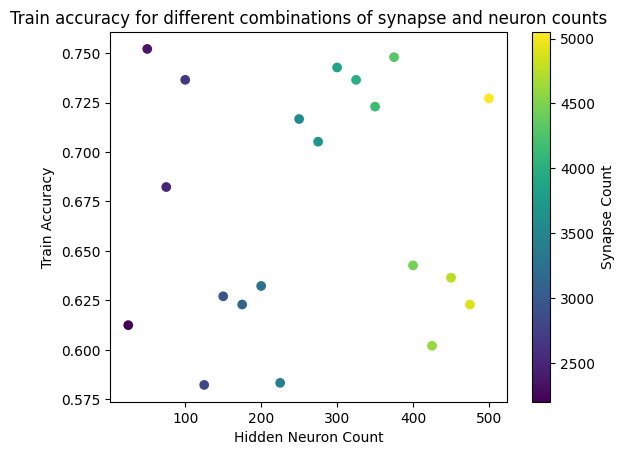

In [6]:
peak_accuracies = [r[-1][0] for r in runs_data]

plt.scatter([r[1] for r in run_labels], peak_accuracies, c=[r[0] for r in run_labels], cmap='viridis')
plt.colorbar(label='Synapse Count')
plt.xlabel('Hidden Neuron Count')
plt.ylabel('Train Accuracy')
plt.title('Train accuracy for different combinations of synapse and neuron counts')

Text(0.5, 1.0, 'Validation Accuracy for different combinations of synapse and neuron counts')

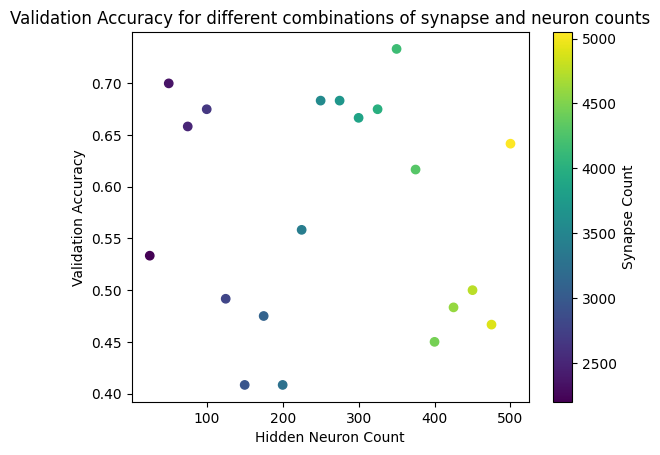

In [7]:
peak_accuracies = [r[-1][1] for r in runs_data] # validation data

plt.scatter([r[1] for r in run_labels], peak_accuracies, c=[r[0] for r in run_labels], cmap='viridis')
plt.colorbar(label='Synapse Count')
plt.xlabel('Hidden Neuron Count')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy for different combinations of synapse and neuron counts')

Text(0.5, 1.0, 'Pop Average for different combinations of synapse and neuron counts')

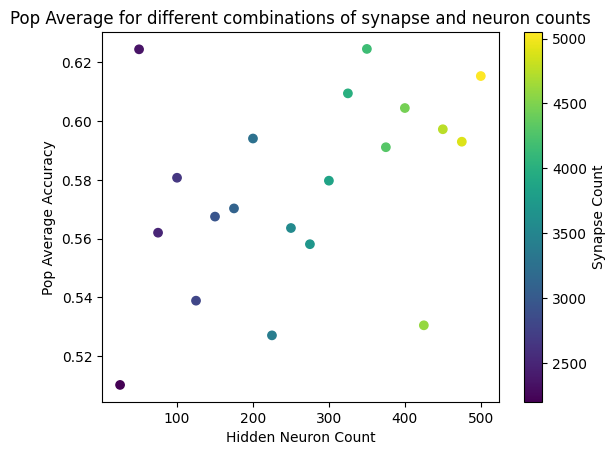

In [8]:
peak_accuracies = [r[-1][2] for r in runs_data] # pop average fit data

plt.scatter([r[1] for r in run_labels], peak_accuracies, c=[r[0] for r in run_labels], cmap='viridis')
plt.colorbar(label='Synapse Count')
plt.xlabel('Hidden Neuron Count')
plt.ylabel('Pop Average Accuracy')
plt.title('Pop Average for different combinations of synapse and neuron counts')

# Misc Graphs

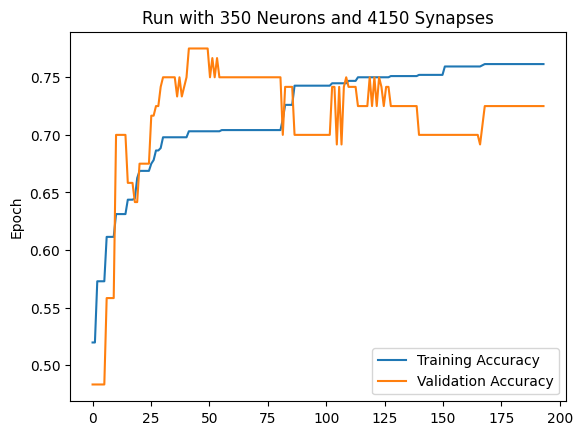

In [14]:
# graph for longer run

log_data = np.array(load_log('./data/test350n4150s/1200-test-log.csv'))

plt.title('Run with 350 Neurons and 4150 Synapses')
plt.ylabel('Accuracy')
plt.ylabel('Epoch')
plt.plot(np.linspace(0, len(log_data[:, 0]), len(log_data[:, 0])), log_data[:, 0], label='Training Accuracy')
plt.plot(np.linspace(0, len(log_data[:, 1]), len(log_data[:, 1])), log_data[:, 1], label='Validation Accuracy')
plt.legend()